# Controladores

##### Version 0.1

`Contenido Original creado por Ezequiel Leonardo Castaño`

<font color='Firebrick'>Este contenido está <b>INCOMPLETO</b> y nuevas secciones serán añadidas en el futuro</font>

Material faltante en este capítulo:
- Control Integral
- Control Derivativo
- Control Proporcional Derivativo
- Control Proporcional Integral
- Control Proporcional Integral Derivativo
- Controladores en Simulink
- Controladores en Simulink - Diferencia entre PID Manual y Bloque PID

___

<nav style="display: flex; justify-content: space-evenly;">
    <a href="https://elc.github.io/control"><img src="https://img.shields.io/badge/Book-Chapters-blue?style=for-the-badge&amp;logo=GitBook&amp;logoColor=white"></a>
    <a href="https://github.com/ELC/control-theory-with-matlab"><img src="https://img.shields.io/badge/Github-Repo-green?style=for-the-badge&amp;logo=github&amp;logoColor=white"></a>
    <a href="https://github.com/ELC/control-theory-with-matlab/issues"><img src="https://img.shields.io/badge/Github%20Issues-Questions-orange?style=for-the-badge"></a>
</nav>

<br><nav style="display: flex; justify-content: space-between;">
    <a href="https://elc.github.io/link/control_05"><img src="https://img.shields.io/badge/%20%20%3C%20Previous%20Chapter--grey?style=for-the-badge"></a>
    <a href="https://elc.github.io/link/control_07"><img src="https://img.shields.io/badge/Next%20Chapter%20%3E--grey?style=for-the-badge"></a>
</nav>

In [ ]:
%plot inline --format=png -w 1600 -h 500

In [2]:
format compact;

# Control Proporcional

El controlador proporcional o **controlador P** es aquel que se obtiene al multiplicar al sistema por una ganacia $K_p$. Al analizar el diagramas de bloque asociado, es importante destacar las similitudes y las diferencias con este tipo de controlador y el diagrama que utiliza internamente la función **rlocus**

<center><img src="images/controllers/image_0.png"></center>

Si bien el control proporcional y el root locus son similares, no son idénticos. Esto se debe a que **rlocus** asume que la retroalimentación está en la trayectoría de retroalimentación y no en la trayectoría directa. Para evaluar que implica esto, es necesario hacer la reducción de bloques en cada caso.


En el caso del **Control proporcional** la reducción de bloques queda

$$\frac{Y(s)}{U(s)}~\Rightarrow ~\frac{K_p \cdot Y(s)}{U(s)}~\Rightarrow ~\frac{\frac{K_p \cdot Y(s)}{U(s)}}{1+\frac{K_p \cdot Y(s)}{U(s)}}~\Rightarrow ~\frac{K_p \cdot Y(s)}{U(s)+K_p \cdot Y(s)}$$

Y en el caso del **Root Locus** la reducción de bloques queda

$$\frac{Y(s)}{U(s)}~\Rightarrow ~\frac{\frac{Y(s)}{U(s)}}{1+K_p \cdot \frac{Y(s)}{U(s)}}~\Rightarrow ~\frac{Y(s)}{U(s)+K_p \cdot Y(s)}$$

Se puede observar como los **denominadores** son iguales mientras que los numeradores no lo son, surje entonces la pregunta ¿es esta diferencia relevante? La respuesta es que no, ya que el **rlocus** sólo muestra **polos** y **ceros**. Como el denominador es el mismo, ambos sistemas tienen la misma ecuación característica, y por ende, los mismos polos. Por otro lado, como $K_p$ es una constante, las posiciones de los ceros tampoco se ven alteradas.

Esto no quiere decir que ambos sistemas sean *equivalentes* ya que la **respuesta** del sistema en cada caso va a ser diferente, pero los ceros y polos se mantendrán como estaban originalmente.

Entonces el método de **rlocus** nos permite evaluar exactamente donde se situarán los polos en lazo cerrado al utilizar la función en lazo abierto ***como si*** estuvieramos usando un controlador Proporcional.

## Efectos del controlador proporcional

Como se mostró en la sección anterior, un controlador P **no** agrega polos ni ceros, sin embargo, **si** modifica la posición de los ya existentes.

Aumentar el valor de $K_p$ tiene los siguientes efectos en las métricas de rendimiento:

- **Rise Time**: Disminuye
- **Overshoot**: Aumenta
- **Settlling time**: Casi sin efecto
- **Stabilidad Relativa**: Empeora
- **Steady-State Error**: Disminuye

Para llegar a esas conclusiones basta con analizar el efecto del controlador en sí. Al aumentar $K_p$ lo que se hace es aumentar el **error** con respecto a la entrada de manera artificial, esto hace que el sistema reaccione como si el error fuera más grande de lo que realmente es y de esta manera toma cambios más abruptos, provocando un **pico más pronto** y **aumentando la amplitud del pico.** Como el error luego disminuye drásticamente, también lo hace la señal de salida del controlador y por lo tanto el tiempo de asentamiento apenas se ve modificado.

### Estabilidad

En cuanto a la estabilidad, existen 3 casos

- Siempre Estable
- Siempre Inestable
- Estabilidad dependiende de K

### Siempre estable

Esto ocurre cuando todas las ramas del root locus está totalmente a la izquierda del eje imaginario.

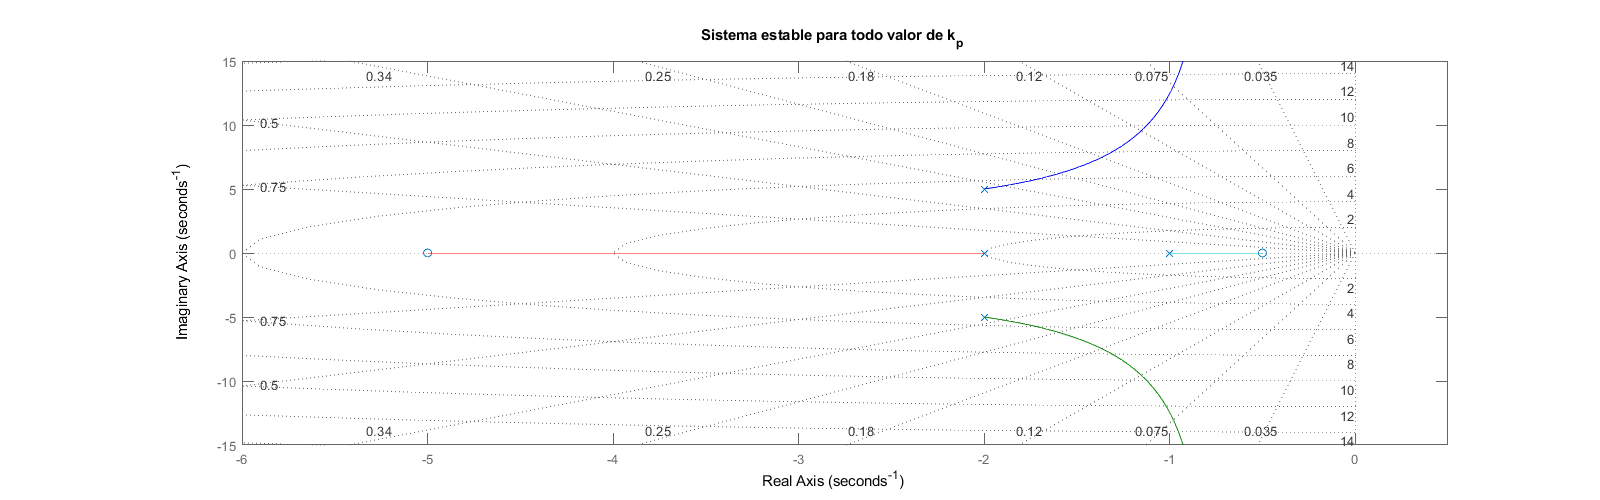

In [3]:
ceros = transpose([-0.5, -5]);
polos = [-1 -2 -2+5j -2-5j];
[num, den] = zp2tf(ceros, polos, [1]);
sistema = tf(num, den);
figure;
rlocus(sistema)
xlim([-6 0.5])
ylim([-15 15])
title("Sistema estable para todo valor de k_p")
grid on

### Siempre inestable

Esto ocurre cuando una de las ramas o (loci) del root locus está totalmente a la derecha del eje imaginario.

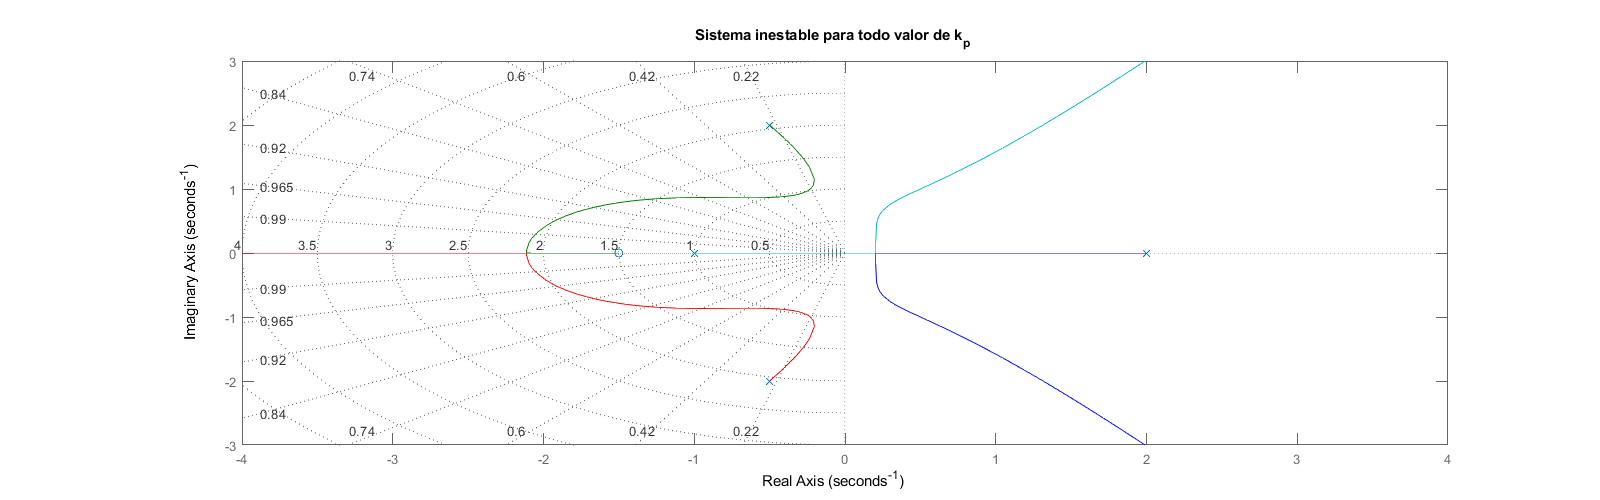

In [4]:
ceros = [-1.5];
polos = [-1 2 -0.5+2j -0.5-2j];
[num, den] = zp2tf(ceros, polos, [1]);
sistema = tf(num, den);
rlocus(sistema)
xlim([-4 4])
ylim([-3 3])
title("Sistema inestable para todo valor de k_p")
grid on

También es posible que todas las ramas tengan una parte en el lado izquierdo del eje imaginario pero que no exista un valor de $K_p$ que haga que todos los polos se ubiquen **simultaneamente** a la derecha del eje imaginario. En el ejemplo siguiente, para que las ramas asociadas a los polos complejos se mantengan a la izquierda del eje imaginario, $K_p$ tiene que ser **menor** que $\approx 5.2$ pero al mismo tiempo, para que la rama asociada con el polo $2$ entre en el semiplano izquierdo, $K_p$ tiene que ser **mayor** que $\approx 9.70$. De esta manera se concluye que el sistema es siempre inestable ya que $K_p$ no puede ser menor que $5.2$ y simultaneamente mayor que $9.70$

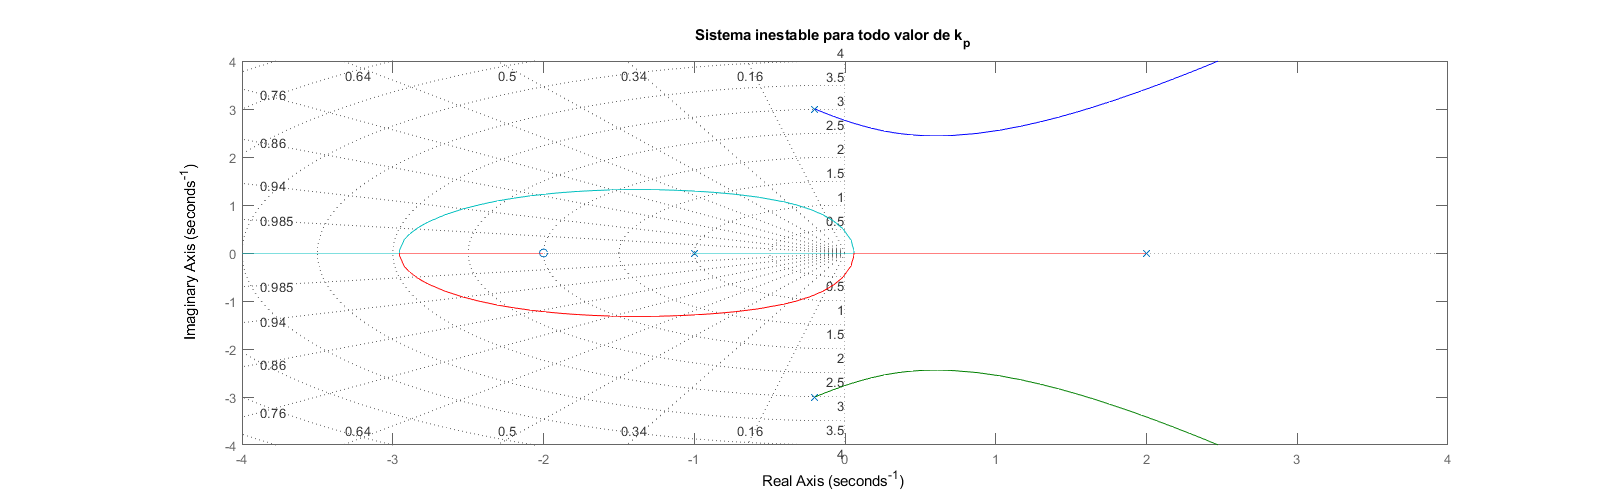

In [5]:
ceros = [-2];
polos = [-1 2 -0.2+3j -0.2-3j];
[num, den] = zp2tf(ceros, polos, [1]);
sistema = tf(num, den);
rlocus(sistema)
xlim([-4 4])
ylim([-4 4])
title("Sistema inestable para todo valor de k_p")
grid on

### Estabilidad dependiende de K

Esto ocurre cuando una o más ramas tienen algunas de sus secciones a la derecha del eje imaginario, esto quiere decir que para un $K_p$ suficientemente grande, el sistema se vuelve inestable, pero para valores menores a ese $K_p$ crítico, el sistema es estable. A simple vista, siempre que haya una única rama que cruza al semiplano derecho (o un par de ramas simétricas), va a existir un $K_p$ para el cual el sistema va a ser estable, si hay varias ramas no simétricas que pasan al semiplano derecho, es necesario evaluar el $K_p$ crítico para cada una, como se hizo en el caso anterior.

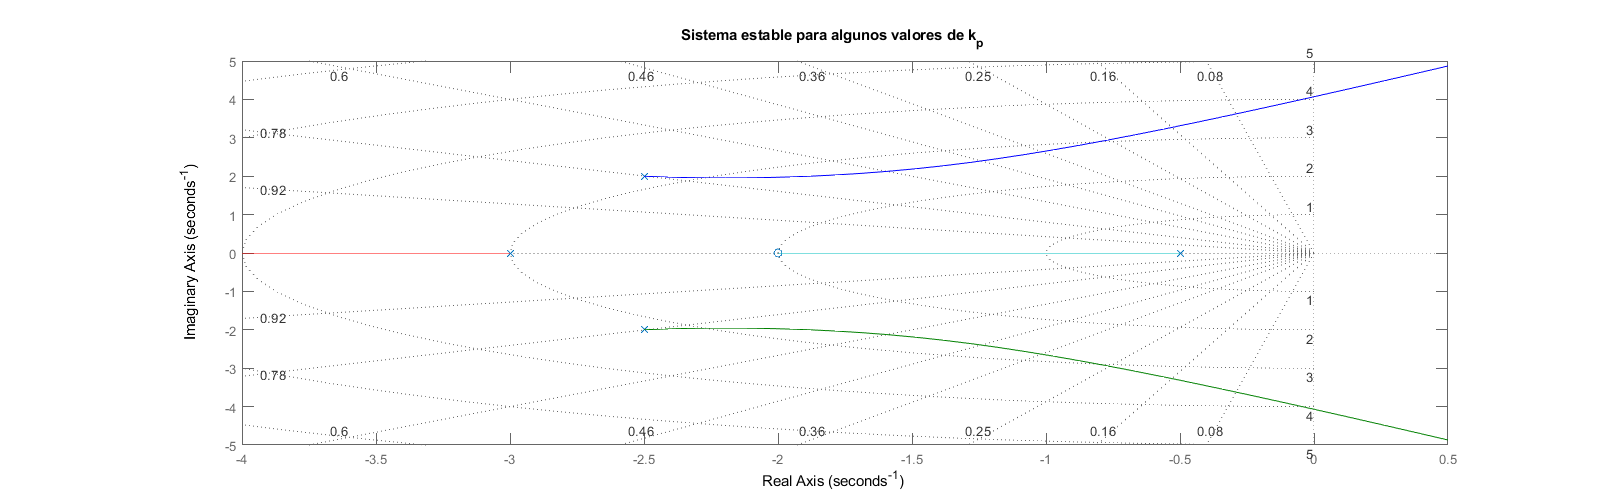

In [6]:
ceros = transpose([-2]);
polos = [-3 -0.5 -2.5+2j -2.5-2j];
[num, den] = zp2tf(ceros, polos, [1]);
sistema = tf(num, den);
rlocus(sistema)
xlim([-4 0.5])
ylim([-5 5])
title("Sistema estable para algunos valores de k_p")
grid on

## Error en estado estacionario

Una vez verificado que el sistema es estable (para un $K_p$ determinado), el error en estado estable se puede calcular, pero, éste no depende sólo del valor de $K_p$ sino del tipo de sistema y de la entrada, si el sistema tenía error infinito o cero antes de aplicar el controlador, ese error se va a mantener (ya que el controlador P no agrega polos ni ceros). Si el error era distinto de 0 y finito, entonces se puede calcular con la fórmula del error en estado estable (luego de haber verificado que el sistema es estable), haciendo uso del teorema del valor final. Como todos los términos de $s$ tienden a $0$, el error queda definido únicamente por los términos independientes del numerados ($a_0$) y del denominador ($b_0$).


Escalón $\frac{1}{s}$: $E_{ss} =\frac{1}{1+\frac{K_p \cdot a_0 }{b_0 }}~\Rightarrow ~\frac{1}{1+K_p }$



Rampa $\frac{1}{s^2 }$: $E_{ss} =\frac{1}{K_p \cdot \frac{a_0 }{b_0 }}~\Rightarrow ~\frac{1}{K_v }$



Parábola $\frac{1}{s^3 }$: $E_{ss} =\frac{1}{K_p \cdot \frac{a_0 }{b_0 }}~\Rightarrow ~\frac{1}{K_a }$


A los valores $K_p$, $K_v {}$ y $K_a$ se los denomina constante de error de **posición**, **velocidad** y **aceleración** respectivamente.


**¡Advertencia con la notación!**

Al término $\frac{K_p \cdot a_0 }{b_0 }$ se lo suele abreviar como $K_p$ cuando se trata de una entrada escalón, pero esa $p$ se refiere **posición** y no a **proporcional** ya que esta nueva constante $K_p$ **no** necesariamente coincide con la ganancia $K_p$ del controlador. El único caso donde coincidirían sería cuando $a_0 =1$ y $b_0 =1$. Si bien la expresión no está definida para el valor $b_0 =0$ esto no es un problema ya que en ese caso el sistema sería de un tipo superior y por ende el error en estado estacionario sería 0.


**Error y tipo de sistema**

El error no sólo se define por la entrada sino también por el **tipo de sistema**, el tipo de sistema hace referencia a la cantidad de polos en el origen, otra formas equivalentes de determinar el tipo de sistema son:

- Cantidad de integradores puros
- Cantidad de polos en el origen de coordenadas
- Grado del factor común $s$ del denominador
- Grado de $s$ del término con menor grado del denominador

La tabla que relaciona los tipos de sistema con sus respectivos errores en estado estacionarios se muestra a continuación

<center><img src="images/controllers/image_1.png"></center>

Fuente: https://ctms.engin.umich.edu/CTMS/index.php?aux=Extras\_Ess

## Controlador en Matlab

In [7]:
ceros = transpose([-2]);
polos = [-3 -0.1 -2.5+2j -2.5-2j];
[num, den] = zp2tf(ceros, polos, [1]);
sistema = tf(num, den);
sistema


sistema =
 
                     s + 2
  -------------------------------------------
  s^4 + 8.1 s^3 + 26.05 s^2 + 33.27 s + 3.075
 
Continuous-time transfer function.




El sistema es de grado 3 por lo tanto, no se pueden usar ninguna de las fórmulas de la sección anterior

## Estabilidad

Si se ve el root locus, se valida que el sistema es estable para todos los valores de K

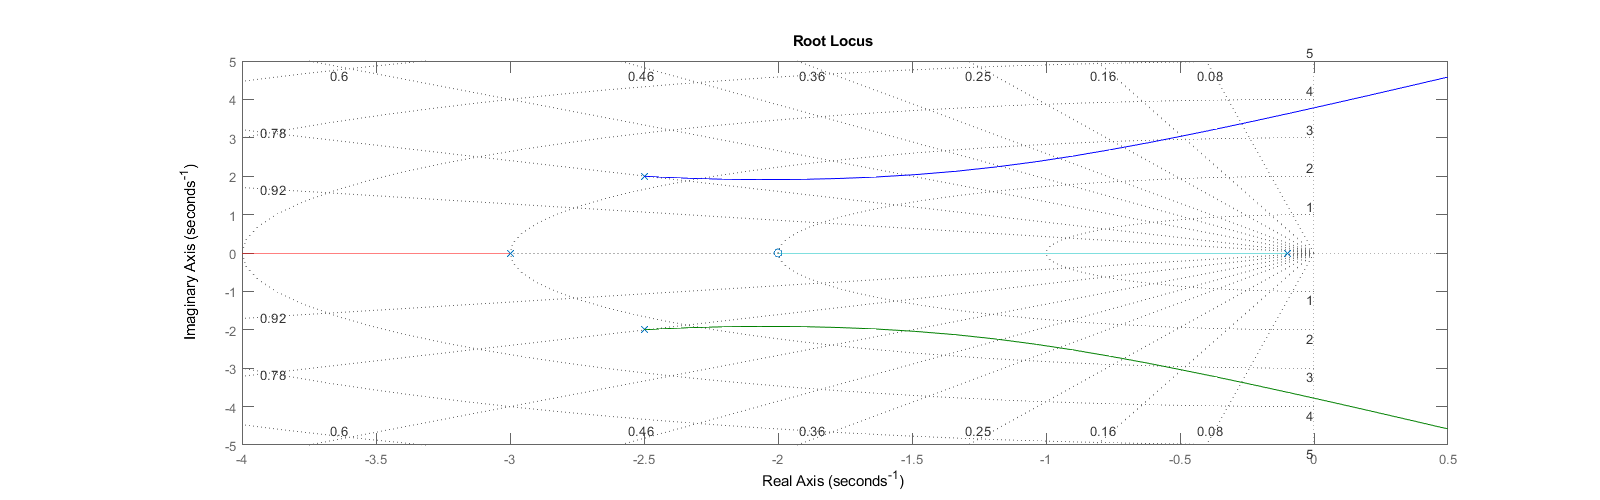

In [8]:
rlocus(sistema)
xlim([-4 0.5])
ylim([-5 5])
grid on

## Salida en lazo abierto

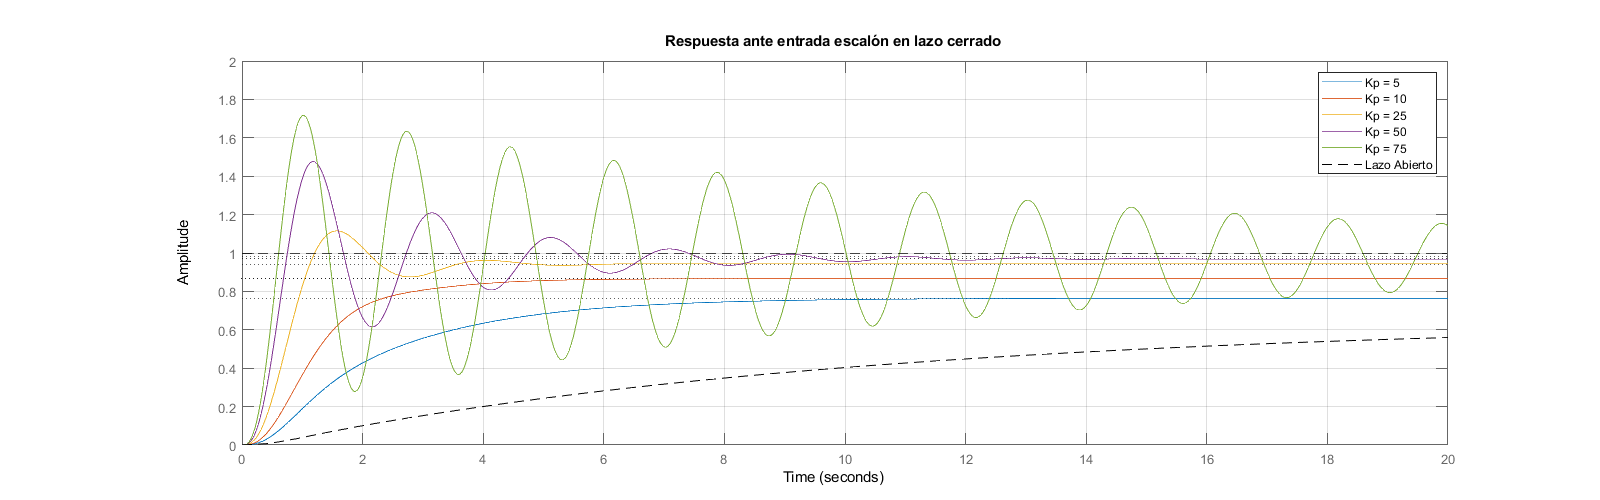

In [9]:
figure;
hold on

ganancia_valores = [5 10 25 50 75];
for index = 1:length(ganancia_valores)
    kp = ganancia_valores(index);
    [num, den] = zp2tf(ceros, polos, [1]);
    sistema = tf(num, den);
    lazo_cerrado{index} = feedback(kp*sistema, 1);
    legend_info{index} = ['Kp = ' num2str(kp)]; 
end

step(lazo_cerrado{:})

[respuesta, tiempo] = step(sistema);
plot(tiempo, respuesta, "--k")


yline(1, "--k")
legend_info{index+1} = "Lazo Abierto";
legend(legend_info)
title("Respuesta ante entrada escalón en lazo cerrado")
xlim([0 20])
ylim([0 2])
grid on

## Salida en lazo cerrado

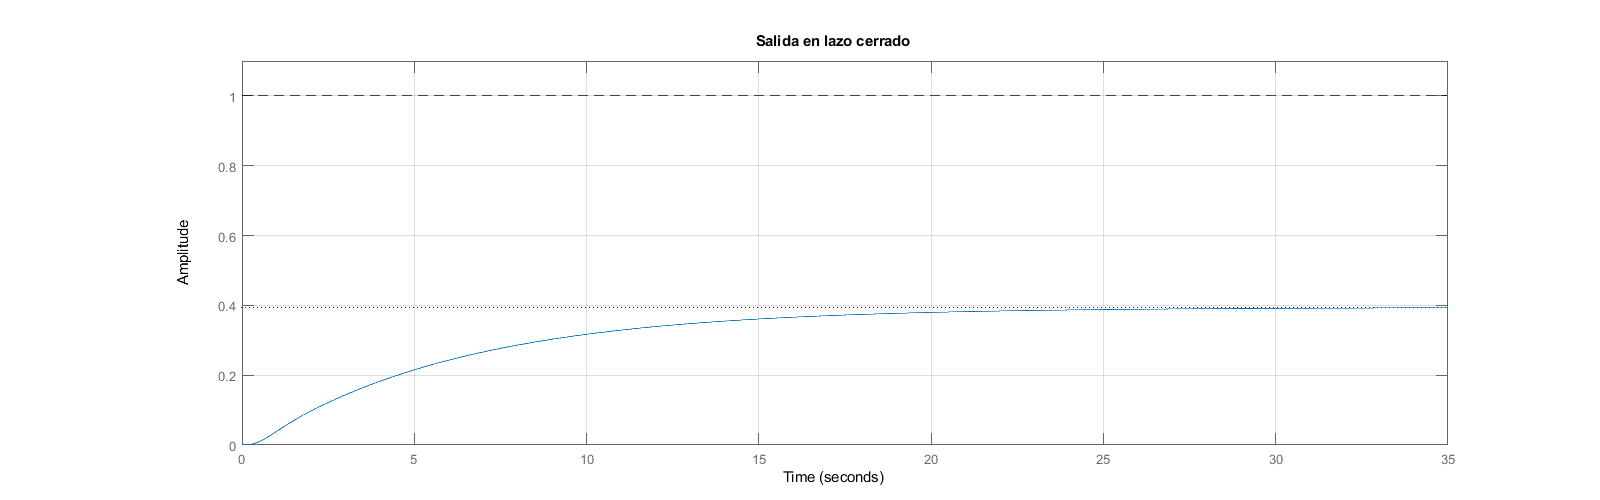

In [10]:
figure;
step(feedback(sistema, 1)) % Se asume retroalimentación unitaria
yline(1, "--k")
ylim([0 1.1])
title("Salida en lazo cerrado")
grid on

# Diseño de Controladores

A la hora de diseñar un controlador es necesario en primera medida determinar que modificaciones hacen falta en el sistema para poder alcanzar los requisitos de diseño.

Los controladores vistos permiten hacer lo siguiente:

- **Control Proporcional**: Mueve los polos en lazo cerrado
- **Control Proporcional Derivativo**: Agrega un Cero Real y mueve los polos en lazo cerrado
- **Control Proporcional Integral**: Agrega un Polo en el origen y mueve los polos en lazo cerrado
- **Control Proporcional Integral Derivativo**: Agrega un Polo en el origen y dos ceros (reales o complejos) y mueve los polos en lazo cerrado


Debido a estas características intrínsecas de los controladores, es útil expresar los requerimientos de diseño en función de los ceros y polos cuando sea posible. Algunos requisitos puntuales pueden no poder expresarse de esta forma pero otros como el overshoot si pueden.

Otra consideración importante es que los controladores **no** modifican la planta que controlan, esto quiere decir que todos los ceros y polos existentes no pueden moverse, no obstante, aquellos que introduce el controlador si. Para ver esto de manera gráfica puede utilizarse el **``Control System Designer``** y, si bien es posible hacerlo mediante la interfaz gráfica como se mostró al hacer el Root Locus. Como en este caso la planta tiene una función de transferencia conocida, es posible abrir la aplicación con la planta ya inicializada mediante el comando **``controlSystemDesigner``** y agregará automaticamente la salida ante una entrada escalón y el root locus.

In [11]:
sistema = tf([1 3], [1 5 9 5]);
% controlSystemDesigner(sistema); % Ejecutar en Matlab, no en Jupyter

<br><nav style="display: flex; justify-content: space-between;">
    <a href="https://elc.github.io/link/control_05"><img src="https://img.shields.io/badge/%20%20%3C%20Previous%20Chapter--grey?style=for-the-badge"></a>
    <a href="https://elc.github.io/link/control_07"><img src="https://img.shields.io/badge/Next%20Chapter%20%3E--grey?style=for-the-badge"></a>
</nav>